# Session 5 - Prediction

In [79]:
import pandas as pd
import numpy as np #to manipulate a lot of numbers, matrix, array...
from sklearn.ensemble import RandomForestClassifier

Load DF from github/aitianshi

In [2]:
df = pd.read_pickle("data_Etienne.pkl")

In [3]:
df.head()

,Country (according to CN Gov):,Date of research inquiry,HF Index of Economic Freedom (Scale: 1-100),Heritage Foundation Index of Economic Freedom (Global Ranking),Bertelsmann Transformation index (BTI),Bertelsmann Transformation index (BTI) - Ranking,IMF WB Customs and other import duties (% of tax revenue) 2016,WB IMF Non-performing loans to total gross loans ratio (%),Moody's Socvereign Ratings List,S&P Sovereign Ratings List,...,BRI Percentage of Urban Population in Total Population,WB Cost of Starting a Business,WB Ease of Doing Business Index (1 = most business-friendly regulations),WB Logistics Performance Index (LPI) (range: 1-5),IFDI Net Inflows (% of GDP),ED National Electric Power Consumption TwH,"WHO Current Health Expenditure p.c., PPP USD",WB Research Expenditure % of GDP,WIPO Trademark applications,WIPO Patent Applications
1,Afghanistan,NaT,51.5,152.0,2.954762,121.0,35.203141,12.201830,NaN,NaN,...,26.703,0.0,NaN,NaN,0.718898,NaN,162.781158,NaN,NaN,NaN
2,Albania,NaT,66.5,52.0,6.828571,30.0,2.216459,13.232533,8,7,...,57.407,0.0,NaN,NaN,8.015508,NaN,759.666984,NaN,1232.0,14.0
3,Armenia,NaT,67.7,47.0,5.576190,61.0,6.275395,5.432318,9,NaN,...,62.673,0.0,NaN,NaN,2.044111,NaN,876.856857,NaN,2685.0,107.0
4,Azerbaijan,NaT,65.4,60.0,4.127381,100.0,7.571847,NaN,12,12,...,54.62,0.0,NaN,NaN,2.988948,NaN,1193.058830,NaN,2817.0,144.0
5,Bahrain,NaT,66.4,54.0,4.616667,89.0,27.386091,NaN,NaN,12,...,88.775,2.9,NaN,NaN,4.014072,NaN,1866.297320,NaN,253.0,8.0


Select the columns that make sence for what we want to do - Prediction for GDP: we will create a new df with the columns we want (number value not a ranking, GDP, column with value)

In [5]:
df.columns

Index(['Country (according to CN Gov):', 'Date of research inquiry',
       'HF Index of Economic Freedom (Scale: 1-100)',
       'Heritage Foundation Index of Economic Freedom (Global Ranking)',
       'Bertelsmann Transformation index (BTI)',
       'Bertelsmann Transformation index (BTI) - Ranking',
       'IMF WB\nCustoms and other import duties (% of tax revenue) 2016',
       'WB IMF Non-performing loans to total gross loans ratio (%)',
       'Moody's Socvereign Ratings List', 'S&P Sovereign Ratings List',
       'Fitch Sovereign Ratings List',
       'UIC Rail freight (mn ton x km travelled)',
       'ICAO air freight (mn ton x km travelled)',
       'WB Household final consumption expenditure, PPP bn USD',
       'WB UNESCO R&D Expenditure % of GDP',
       'WB UNESCO Researchers p. mn inhabitants',
       'TI Corruption Perception Index',
       'TI Corruption Perception Index - Ranking', 'BRI GDP', 'BRI GDP p.c.',
       'BRI GDP growth rate', 'BRI Y.o.Y. GDP growth rate p.c

In [6]:
df_modeling = df[['Country (according to CN Gov):',
       'HF Index of Economic Freedom (Scale: 1-100)',
       'Bertelsmann Transformation index (BTI)',
       'WB UNESCO R&D Expenditure % of GDP',
       'WB UNESCO Researchers p. mn inhabitants',
       'TI Corruption Perception Index',
       'BRI GDP p.c.']]

Remove missing values

In [8]:
df_modeling = df_modeling.dropna()
df_modeling.head()

,Country (according to CN Gov):,HF Index of Economic Freedom (Scale: 1-100),Bertelsmann Transformation index (BTI),WB UNESCO R&D Expenditure % of GDP,WB UNESCO Researchers p. mn inhabitants,TI Corruption Perception Index,BRI GDP p.c.
2,Albania,66.5,6.828571,0.15412,156.10110,36.0,3965.01680558488
5,Bahrain,66.4,4.616667,0.10116,368.90235,36.0,23395.7476902684
9,Bosnia and Herzegovina,61.9,6.282143,0.19951,463.89852,38.0,4197.80730449044
11,Bulgaria,69.0,7.800000,0.77079,2130.54538,42.0,6819.86910816324
12,Cambodia,58.7,4.000000,0.11823,30.37447,21.0,1158.69


# See the distribution

Regression line to predict BRI GDP p.c. : but not smart to predict GDP as a number, instead predict on different scale (low, average, high)

Problem with the column BRI GDP p.c. that is consider as an object and not number type (because we put NaN)

In [14]:
df_modeling['BRI GDP p.c.'] = df_modeling['BRI GDP p.c.'].apply(lambda x: float(x)) #or apply(float)

In [13]:
df_modeling['BRI GDP p.c.']

2      3965.016806
5     23395.747690
9      4197.807304
11     6819.869108
12     1158.689904
14    11535.829356
15    17231.281711
17     3614.746766
18    17295.363830
20     3795.973308
22    12259.115028
23     1581.588913
24     3346.487039
28     4940.045838
29    10508.396403
30    28984.643389
32     1812.326765
33    13664.941428
35    14172.221070
36     4852.657847
37     9766.165752
39     1843.242802
41     6415.034084
42     1203.505387
43      732.298716
44    15645.080729
45     1428.988637
46     2899.375278
47    12494.466190
48    74667.197071
49     8972.922518
50     9057.113060
52     5143.949926
53    52888.744672
54    15962.572239
55    20713.074746
56     3926.174396
59     5816.440690
60    40438.376363
61     9130.026065
65     2114.954716
66     2132.072442
67     2111.138024
Name: BRI GDP p.c., dtype: float64

See the distribution of BRI GDP p.c. : the goal is to show the low, average, high

In [53]:
#if a graphic is generated, put it in the html:
%matplotlib inline 

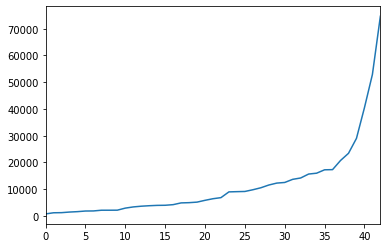

In [47]:
# This will first sort the series and then plot, ignoring the index of the series:
df_modeling['BRI GDP p.c.'].sort_values().plot(use_index=False)

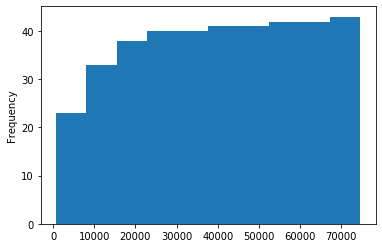

In [52]:
# Or cumulative 
df_modeling['BRI GDP p.c.'].plot.hist(cumulative=True)

# Bins

In [54]:
df_modeling['BRI GDP p.c.'].describe()

count       43.000000
mean     11503.154977
std      14498.323548
min        732.298716
25%       3122.931159
50%       6415.034084
75%      13918.581249
max      74667.197071
Name: BRI GDP p.c., dtype: float64

3 bins - Low, average, hight : 0, 5000, 20K, ... 
Use cut when you need to segment and sort data values into bins. 

In [67]:
bins = [0, 5000, 20000, df_modeling['BRI GDP p.c.'].max()]
labels=["low", "average", "high"]
df_modeling['GDP'] = pd.cut(df_modeling['BRI GDP p.c.'], bins, labels=labels)
df_modeling.head()

,Country (according to CN Gov):,HF Index of Economic Freedom (Scale: 1-100),Bertelsmann Transformation index (BTI),WB UNESCO R&D Expenditure % of GDP,WB UNESCO Researchers p. mn inhabitants,TI Corruption Perception Index,BRI GDP p.c.,GDP
2,Albania,66.5,6.828571,0.15412,156.10110,36.0,3965.016806,low
5,Bahrain,66.4,4.616667,0.10116,368.90235,36.0,23395.747690,high
9,Bosnia and Herzegovina,61.9,6.282143,0.19951,463.89852,38.0,4197.807304,low
11,Bulgaria,69.0,7.800000,0.77079,2130.54538,42.0,6819.869108,average
12,Cambodia,58.7,4.000000,0.11823,30.37447,21.0,1158.689904,low


# Scaler

Scale each columns: at the end we have 5 columns prepared to have our low, high, average

In [74]:
from sklearn.preprocessing import StandardScaler
# Create engine for the scaler
scaler = StandardScaler() #scaler like 'centré réduit'
# Fit: select some columns, it's expecting more than one column so u need to write like this [[]]
df_modeling['HF_scaled'] = scaler.fit_transform(df_modeling[['HF Index of Economic Freedom (Scale: 1-100)']])
df_modeling['BTI_scaled'] = scaler.fit_transform(df_modeling[['Bertelsmann Transformation index (BTI)']])
df_modeling['R&D_scaled'] = scaler.fit_transform(df_modeling[['WB UNESCO R&D Expenditure % of GDP']])
df_modeling['researchers_scaled'] = scaler.fit_transform(df_modeling[['WB UNESCO Researchers p. mn inhabitants']])
df_modeling['corruption_scaled'] = scaler.fit_transform(df_modeling[['TI Corruption Perception Index']])

In [76]:
df_export = df_modeling[['HF_scaled', 'BTI_scaled', 'R&D_scaled', 'researchers_scaled', 'corruption_scaled', 'GDP']]

In [77]:
df_export.to_csv('gdp_modeling.csv')

In [78]:
df_export

,HF_scaled,BTI_scaled,R&D_scaled,researchers_scaled,corruption_scaled,GDP
2,0.263836,0.288056,-0.905864,-0.869097,-0.570675,low
5,0.251314,-1.011212,-1.006223,-0.719452,-0.570675,high
9,-0.312177,-0.032915,-0.819850,-0.652649,-0.425043,low
11,0.576887,0.858671,0.262729,0.519359,-0.133778,average
12,-0.712882,-1.373441,-0.973876,-0.957509,-1.662917,low
14,-0.374787,1.016010,0.450846,0.332936,0.303118,average
15,1.165422,1.869835,2.198590,1.615929,1.104096,average
17,-1.489247,-1.209809,-0.049644,-0.508144,-0.643491,low
18,1.528561,1.867737,1.309169,1.530858,2.123521,average
20,1.440906,0.046803,-0.649223,-0.036768,1.031279,low


# Modeling

Goal now is to apply models on the scaled df: we will use slearn

The columns are ready, the prediction is ready. Now we need to train 75% of the data and 25% for testing (usually)

In [80]:
# Create a column is_train and I do a random between 0 and 1 and I put the ratio I want : attribute a random number for each line 
# and if it <= .75 it puts true otherwise false
df_export['is_train'] = np.random.uniform(0, 1, len(df_export)) <= .75
df_export['is_train']
# Regardless of the warning

C:\Users\tianh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


2      True
5      True
9      True
11     True
12     True
14     True
15     True
17     True
18     True
20     True
22    False
23     True
24     True
28     True
29     True
30    False
32     True
33     True
35     True
36    False
37     True
39     True
41     True
42     True
43    False
44    False
45     True
46     True
47     True
48     True
49     True
50     True
52     True
53     True
54    False
55     True
56    False
59     True
60     True
61     True
65    False
66     True
67    False
Name: is_train, dtype: bool

Now we split our df in train and test

In [81]:
train, test = df_export[df_export['is_train']==True], df_export[df_export['is_train']==False]
len(test)

9

We take the column from the features (column 0 to 4) and we select the column we want to predict and goal column

In [83]:
features = df_export.columns[0:5]
features

Index(['HF_scaled', 'BTI_scaled', 'R&D_scaled', 'researchers_scaled',
       'corruption_scaled'],
      dtype='object')

?

In [84]:
y_train = np.array(train['GDP'])
y_train

array(['low', 'high', 'low', 'average', 'low', 'average', 'average',
       'low', 'average', 'low', 'low', 'low', 'low', 'average', 'low',
       'average', 'average', 'average', 'low', 'average', 'low', 'low',
       'low', 'average', 'high', 'average', 'average', 'average', 'high',
       'high', 'average', 'high', 'average', 'low'], dtype=object)

In [85]:
from sklearn.metrics import classification_report

rfc = RandomForestClassifier()
#This is what we want to train on and this is our result
rfc.fit(train[features], y_train)
#Then we make a prediction by giving the test features and according to this can you predict
#We want to compare the prediction and what is true (we already have the value of GDP) => minimize this difference
y_predict = rfc.predict(test[features])
y_true = test['GDP']

print(classification_report(y_true, y_predict))

              precision    recall  f1-score   support

     average       0.67      0.67      0.67         3
        high       0.00      0.00      0.00         1
         low       0.67      0.80      0.73         5

    accuracy                           0.67         9
   macro avg       0.44      0.49      0.46         9
weighted avg       0.59      0.67      0.63         9



C:\Users\tianh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\tianh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
